## TASK 3_2

In [57]:
!pip install CVXPY

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

The optimazion function is: 
\begin{aligned} 
\min_{x_1,x_2} \quad & \frac{1}{2}x_1^{2}+4x_2^{2}-32x_2+60\\ 
\textrm{s.t.} \quad & x_1 + x_2 \leq 6\\ 
  & x_1 + 2x_2 \leq 8\\ 
  & x_1 \geq 0, x_2 \geq 0, x_2 \leq 9 \\ 
\end{aligned}

In [59]:
x = cp.Variable(2) #x1 and x2
obj_function = 0.5*x[0]**2 + 4*x[1]**2 - 32*x[1] + 60
obj = cp.Minimize(obj_function)

constraint = [x[0] + x[1] <= 6,
              x[0] + 2*x[1] <= 8,
              x[0] >= 0,
              x[1] >= 0,
              x[1] <= 9]
proj = cp.Problem(obj,constraint)
result = proj.solve() # solver = "OSQP" (Operator Splitting Quadratic Program) solver is a numerical optimization package for solving convex quadratic programs 

print(f'Problem status: {proj.status}')
print(f'The min value of the function is {result}')
print(f'The optimal values of the variables x1: {x.value[0]:0.2f} , x2: {x.value[1]:0.2f}')

Problem status: optimal
The min value of the function is -4.0
The optimal values of the variables x1: 0.00 , x2: 4.00


\begin{equation} 
\begin{aligned} 
\min_{x} \quad & f(x)= \frac{1}{2}x^{T}Hx+cx+c_0\\ 
\textrm{s.t.} \quad & Ax \leq b\\ 
\end{aligned} 
\end{equation} 
 
The following function is obtained: 
 
\begin{equation} 
\begin{aligned} 
\min_{x} \quad & f(x)= \frac{1}{2}\begin{bmatrix} 
x1 & x2\\  
\end{bmatrix} \begin{bmatrix} 
1 & 0\\ 0 & 8\\  
\end{bmatrix} \begin{bmatrix} 
x1 \\ x2\\  
\end{bmatrix} + \begin{bmatrix} 
0 & -32 \\  
\end{bmatrix} \begin{bmatrix} 
x1 \\ x2\\  
\end{bmatrix} + c_0 
\\ 
\textrm{s.t.} \quad & \begin{bmatrix} 
1 & 1\\ 
1 & 2\\ 
-1& 0\\ 
0 &-1\\ 
0 & 1\\ 
\end{bmatrix} \begin{bmatrix} 
x1 \\ x2\\  
\end{bmatrix} \leq \begin{bmatrix} 
6\\ 
8\\ 
0\\ 
0\\ 
9\\ \ 
\end{bmatrix}\\ 
\end{aligned} 
\end{equation}

In [60]:
H = np.array([[1,0],[0,8]])
C = np.array([0,-32])
c0 = 60
A = np.array([[1,1],[1,2],[-1,0],[0,-1],[0,1]])
b = np.array([6,8,0,0,9])

x = cp.Variable(2, nonneg=True) #x1 and x2
obj_function = (1/2)*cp.quad_form(x, H) + C @ x + c0
obj = cp.Minimize(obj_function)

constraint = [A@x<=b]
proj = cp.Problem(obj,constraint)
result = proj.solve() # solver = "OSQP" (Operator Splitting Quadratic Program) solver is a numerical optimization package for solving convex quadratic programs 

print(f'Problem status: {proj.status}')
print(f'The min value of the function is {result}')
print(f'The optimal values of the variables x1: {x.value[0]:0.2f} , x2: {x.value[1]:0.2f}')

Problem status: optimal
The min value of the function is -4.0
The optimal values of the variables x1: 0.00 , x2: 4.00


## Visualization

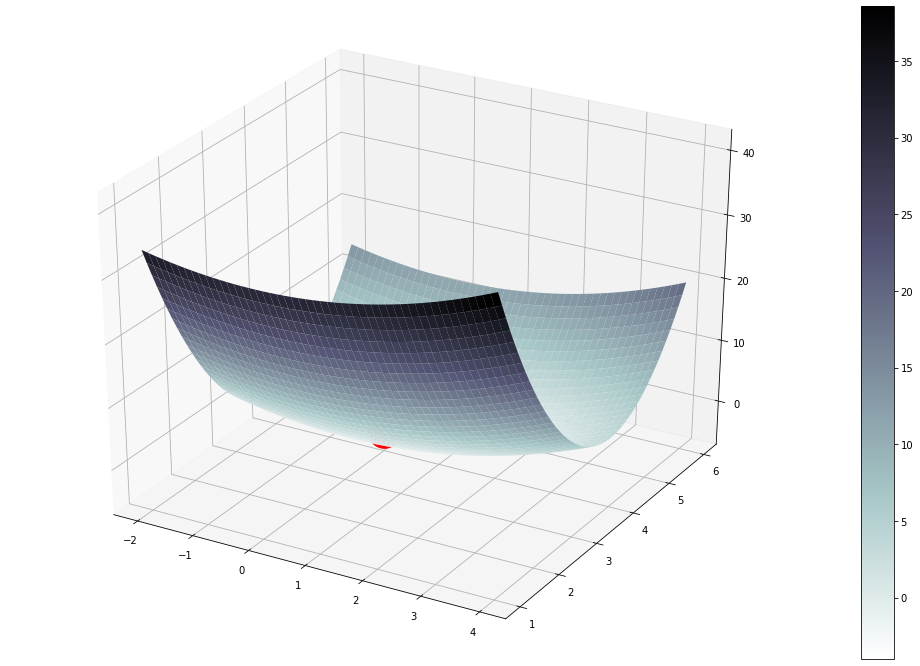

In [61]:
import matplotlib.pyplot as plt
from matplotlib import cm

x1=np.linspace(-2,4)
x2=np.linspace(1,6)
x1,x2= np.meshgrid(x1,x2)

func = lambda x1, x2: 0.5*x1**2 + 4*x2**2 - 32*x2 + c0
cost = func(x1, x2)

fig=plt.figure()
ax=fig.gca(projection='3d')
visualize= ax.plot_surface(x1,x2,cost,cmap=cm.bone_r)
fig.colorbar(visualize)
ax.scatter(x.value[0], x.value[1], result, c="red", s=1000)
fig.set_size_inches(18,12)